In [2]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas import DataFrame
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
def box_plot(data, headers, title, y_labels=None):
    fig, ax = plt.subplots()
    fig.dpi = 100.0
    ax.set_title(title)
    ax.ticklabel_format(useOffset=False, style='plain')
    ax.set_xticklabels(headers)
    if y_labels is not None:
        ax.set_yticklabels(y_labels)
    ax.boxplot(data)

In [4]:
# Import covid rumour predictions
covid_df = pd.read_csv('/content/drive/MyDrive/Data/covid_predictions_dataframe.csv')

In [5]:
covid_df.head()

,tweet_id,text,time,parent,follower_count,user_id,label
0,1272262651100434433,"According to the New York Times, Warner Bros. ...",Sun Jun 14 20:20:28 +0000 2020,NaN,26179,1011312260805996547,rumour
1,1287153210990395392,Hurricane Hanna has made landfall in Texas.\n\...,Sat Jul 25 22:30:14 +0000 2020,NaN,248090,44513878,non-rumour
2,1287191952115605505,@TexasTribune Guess what the cause of death is...,Sun Jul 26 01:04:10 +0000 2020,1.287153e+18,1,1266937699128217602,non-rumour
3,1266555444283179008,Monkeys on the loose in India with stolen coro...,Sat May 30 02:22:04 +0000 2020,NaN,3948552,1917731,rumour
4,1257715199655755779,Eastleigh and Swahili Arabs in Mombasa where c...,Tue May 05 16:54:05 +0000 2020,NaN,176217,4811676473,non-rumour


In [6]:
# Split rumour and non rumour datasets
rumour_covid = covid_df.loc[covid_df['label'] == 'rumour']
non_rumour_covid = covid_df.loc[covid_df['label'] == 'non-rumour']

## Topic Modelling using LDA

In [7]:
print(rumour_covid.shape)
print(non_rumour_covid.shape)

(6414, 7)
(248267, 7)


In [8]:
# Pre-processing data

# Remove punct & convert to lowercase
rumour_covid['text_processed'] = rumour_covid['text'].map(lambda x: re.sub('[,\.!?]', '', x))
rumour_covid['text_processed'] = rumour_covid['text_processed'].map(lambda x: x.lower())

# Remove punct & convert to lowercase
non_rumour_covid['text_processed'] = non_rumour_covid['text'].map(lambda x: re.sub('[,\.!?]', '', x))
non_rumour_covid['text_processed'] = non_rumour_covid['text_processed'].map(lambda x: x.lower())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

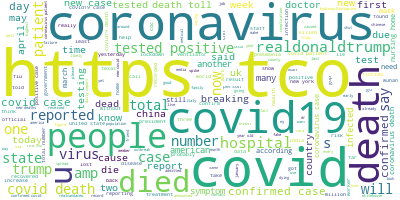

In [9]:
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(rumour_covid['text_processed'].values))

# Create a WordCloud object
rumour_wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
rumour_wordcloud.generate(long_string)

# Visualize the word cloud
rumour_wordcloud.to_image()

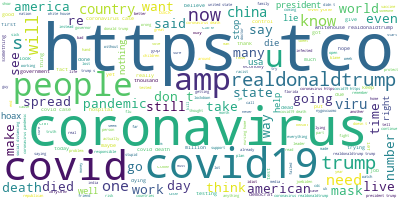

In [10]:
# Join the different processed titles together.
x_long_string = ','.join(list(non_rumour_covid['text_processed'].values))

# Create a WordCloud object
non_rumour_wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
non_rumour_wordcloud.generate(x_long_string)

# Visualize the word cloud
non_rumour_wordcloud.to_image()

In [13]:
from nltk.tokenize import TweetTokenizer
#from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

from nltk.corpus import wordnet

stop_words = stopwords.words('english')
stop_words.extend(['https', '\\'])

# rumour_data = rumour_covid.text_processed.values.tolist()
# non_rumour_data = non_rumour_covid.text_processed.values.tolist()

lemmatizer = nltk.stem.wordnet.WordNetLemmatizer()
tokenizer = TweetTokenizer()

def lemmatize(word):
    lemma = lemmatizer.lemmatize(word,'v')
    if lemma == word:
        lemma = lemmatizer.lemmatize(word,'n')
    return lemma

def tokenize_text(data):
    out = []
    for tweet in data:
        lemma_text = []
        text = tokenizer.tokenize(tweet)
        for word in text:
            lemma = lemmatize(word)
            if lemma not in stop_words:
                lemma_text.append(lemma)
        out.append(lemma_text)
    return out

def process_tokenize(df):
    data = df.text_processed.values.tolist()
    out = tokenize_text(data)
    return out


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
pip install pyldavis 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyldavis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=87a5fc7c81c18328d5e3142e0baef859fe93ee32271bc5eb50139136f60d65f1
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=4536a69b5a467ab62c6de0e37244beec96f57108fe2aaa92ba93397e16aebe1e
  Stored in directory: /root/.cache/pip/wheels/42/56/cc/4a8bf86613aafd5b7f1b310477667c1fca5c51c3ae4124a003
Successfully built pyldavis sklearn


In [25]:
import gensim
import gensim.corpora as corpora
from pprint import pprint
import pyLDAvis

import pyLDAvis.gensim_models
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

def topics(data):
    id2word = corpora.Dictionary(data)
    tokens = data
    corpus = [id2word.doc2bow(token) for token in tokens]
    
    num_topics = 5
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
    
    # Print the Keywords in the 5 topics
    
    return lda_model.print_topics()

   

rumour_processed_data = process_tokenize(rumour_covid)
non_rumour_processed_data = process_tokenize(non_rumour_covid)

rumour_topics = topics(rumour_processed_data)
non_rumour_topics = topics(non_rumour_processed_data)



Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

In [26]:
print("RUMOUR TOPICS")
pprint(rumour_topics)
print("")
print("NON RUMOUR TOPICS")
pprint(non_rumour_topics)

RUMOUR TOPICS
[(0,
  '0.039*"-" + 0.031*"covid" + 0.029*"19" + 0.020*"death" + 0.016*"case" + '
  '0.013*"report" + 0.011*"new" + 0.008*"die" + 0.008*"test" + 0.008*":"'),
 (1,
  '0.021*"covid" + 0.019*"19" + 0.016*"-" + 0.011*"death" + 0.011*"#covid19" + '
  '0.011*"die" + 0.010*"’" + 0.009*"test" + 0.008*""" + 0.007*"coronavirus"'),
 (2,
  '0.021*"19" + 0.019*"covid" + 0.016*"-" + 0.014*""" + 0.013*"die" + '
  '0.009*"coronavirus" + 0.007*"death" + 0.007*"@realdonaldtrump" + 0.006*"\'" '
  '+ 0.006*"hospital"'),
 (3,
  '0.036*"-" + 0.029*"19" + 0.028*"covid" + 0.018*"death" + 0.011*":" + '
  '0.011*"test" + 0.010*")" + 0.010*"case" + 0.010*"(" + 0.009*"coronavirus"'),
 (4,
  '0.029*":" + 0.029*"coronavirus" + 0.021*"death" + 0.013*"case" + '
  '0.013*"#covid19" + 0.011*""" + 0.011*"u" + 0.009*"report" + 0.007*"new" + '
  '0.007*"die"')]

NON RUMOUR TOPICS
[(0,
  '0.042*""" + 0.030*"coronavirus" + 0.018*"trump" + 0.015*"@realdonaldtrump" '
  '+ 0.014*"“" + 0.014*":" + 0.014*"”" + 0.01

#### Analysis

Rumour tweets: More death topics

Non-rumour tweets are responses to @realdonaldtrump?

## Popular hashtags

In [27]:
from collections import Counter
rumour_hash = Counter()
non_rumour_hash = Counter()

for line in rumour_processed_data:
    for word in line:
        if word[0] == '#':
            rumour_hash[word] += 1
            
for line in non_rumour_processed_data:
    for word in line:
        if word[0] == '#':
            non_rumour_hash[word] += 1
# rumour_processed_data


In [ ]:
rumour_hash.most_common(5)

C:\Users\benja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('#covid19', 985),
 ('#coronavirus', 375),
 ('#covid_19', 74),
 ('#covid_19india', 68),
 ('#', 55)]

In [28]:
non_rumour_hash.most_common(5)

[('#covid19', 32596),
 ('#coronavirus', 18441),
 ('#trump', 2551),
 ('#', 1611),
 ('#coronaviruspandemic', 1606)]

In [29]:
non_rumour_words = Counter()
for line in non_rumour_processed_data:
    for word in line:
        non_rumour_words[word] += 1

In [30]:
non_rumour_words.most_common(5)

[('covid', 99239),
 ('19', 97386),
 ('@realdonaldtrump', 85933),
 ('coronavirus', 84974),
 ('-', 81131)]

#### Analysis

Similar hashtags. However, seems that hashtags that involve india are predicted as rumours and trump, non-rumours 

## Rumour Creating Users Characteristics

In [ ]:
# rumour_covid

C:\Users\benja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Follower count Differences

C:\Users\benja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
rumour_follower_v = list(rumour_covid.follower_count.values)
non_rumour_follower_v = list(non_rumour_covid.follower_count.values)

In [ ]:
print("Rumour Mean Follower Count:", np.mean(rumour_follower_v))
print("Rumour Median Follower Count:", np.median(rumour_follower_v))
print("Non Rumour Mean Follower Count:", np.mean(non_rumour_follower_v))
print("Non Rumour Median Follower Count:", np.median(non_rumour_follower_v))


Rumour Mean Follower Count: 1065973.4212659807
Rumour Median Follower Count: 938.5
Non Rumour Mean Follower Count: 355464.1189203559
Non Rumour Median Follower Count: 305.0


C:\Users\benja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
max(non_rumour_follower_v)

123153277

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


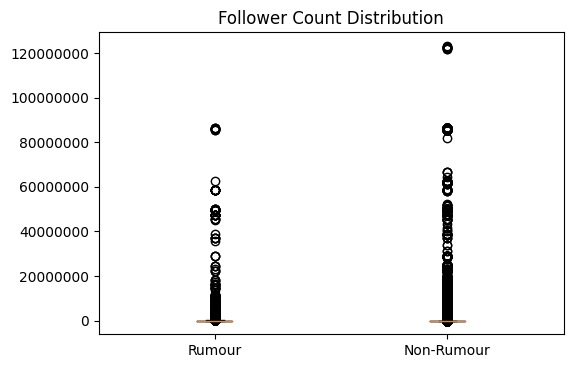

In [33]:
follower_data = rumour_follower_v, non_rumour_follower_v

follower_headers = ['Rumour', 'Non-Rumour']
follower_title = 'Follower Count Distribution'

box_plot(follower_data, follower_headers, follower_title)



#### Analysis

Rumour creating users are seen to have more followers vs non rumour creating accounts based on the predictions made by language model on tweets

## Sentiment Intensity Analysis

In [34]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
# rumour_covid['text_processed'][0]

C:\Users\benja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
import nltk
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

def get_sentiment_score(text_processed):
    out = []
    for line in text_processed:
        score = sid.polarity_scores(line)
        out.append(score['compound'])
    return out

def get_sentiment_score_ind(text):

    return sid.polarity_scores(text)['compound']

# nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


#### All Tweets

In [37]:
# Sentiment of all tweets
rumour_sentiment = get_sentiment_score(rumour_covid['text_processed'])
non_rumour_sentiment = get_sentiment_score(non_rumour_covid['text_processed'])


In [38]:
print('Mean Rumour Sentiment:', np.mean(rumour_sentiment))
print('Median Rumour Sentiment:', np.median(rumour_sentiment))
print('Mean Non Rumour Sentiment:', np.mean(non_rumour_sentiment))
print('Median Non Rumour Sentiment:', np.median(non_rumour_sentiment))



Mean Rumour Sentiment: -0.15141100717181163
Median Rumour Sentiment: -0.0516
Mean Non Rumour Sentiment: -0.14302270619937407
Median Non Rumour Sentiment: -0.0772


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


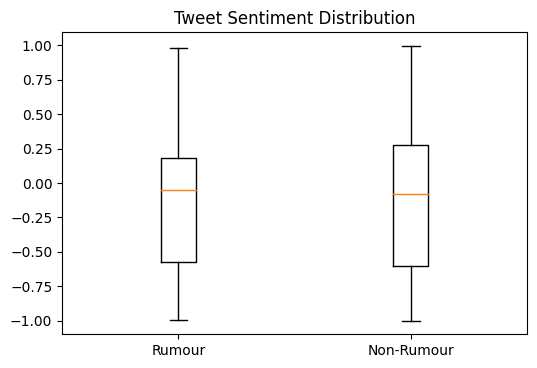

In [39]:
all_sent_data = rumour_sentiment, non_rumour_sentiment
all_sent_headers = ['Rumour', 'Non-Rumour']
all_sent_title = 'Tweet Sentiment Distribution'

box_plot(all_sent_data, all_sent_headers, all_sent_title)

#### Analysis:
Tweet sentiment for rumour and non rumour tweets are similar. Both negative

#### Parent and Child Tweets

In [40]:
# Sentiment of source tweets

# Split rumour and non rumour datasets based on parent or replies
parent_rumour_covid = rumour_covid.loc[rumour_covid['parent'].isnull()]
child_rumour_covid = rumour_covid.loc[rumour_covid['parent'].notnull()]

parent_non_rumour_covid = non_rumour_covid.loc[non_rumour_covid['parent'].isnull()]
child_non_rumour_covid = non_rumour_covid.loc[non_rumour_covid['parent'].notnull()]




In [41]:
# Rumours

parent_rumour_sentiment = get_sentiment_score(parent_rumour_covid['text_processed'])
child_rumour_sentiment = get_sentiment_score(child_rumour_covid['text_processed'])

print('Rumours')
print('Mean Parent Rumour Sentiment:', np.mean(parent_rumour_sentiment))
print('Median Parent Rumour Sentiment:', np.median(parent_rumour_sentiment))
print('Mean Child Rumour Sentiment:', np.mean(child_rumour_sentiment))
print('Median Child Rumour Sentiment:', np.median(child_rumour_sentiment))

# print('Mean Non Rumour Sentiment:', np.mean(non_rumour_sentiment))
# print('Median Non Rumour Sentiment:', np.median(non_rumour_sentiment))

Rumours
Mean Parent Rumour Sentiment: -0.02899872448979592
Median Parent Rumour Sentiment: 0.0
Mean Child Rumour Sentiment: -0.1910194387123401
Median Child Rumour Sentiment: -0.17520000000000002


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


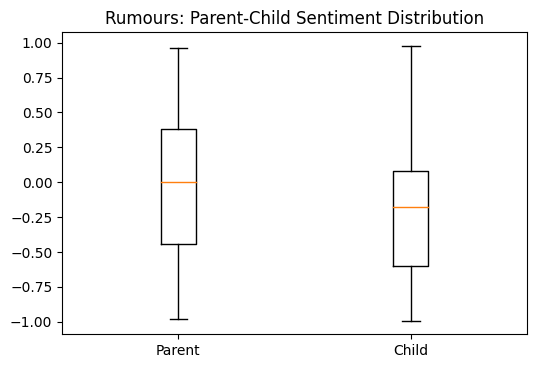

In [42]:
rumour_sent_data = parent_rumour_sentiment, child_rumour_sentiment
rumour_sent_headers = ['Parent', 'Child']
rumour_sent_title = 'Rumours: Parent-Child Sentiment Distribution'

box_plot(rumour_sent_data, rumour_sent_headers, rumour_sent_title)

In [43]:
# Non Rumours

parent_non_rumour_sentiment = get_sentiment_score(parent_non_rumour_covid['text_processed'])
child_non_rumour_sentiment = get_sentiment_score(child_non_rumour_covid['text_processed'])

print('Non-rumours')
print('Mean Parent Non Rumour Sentiment:', np.mean(parent_non_rumour_sentiment))
print('Median Parent Non Rumour Sentiment:', np.median(parent_non_rumour_sentiment))
print('Mean Child Non Rumour Sentiment:', np.mean(child_non_rumour_sentiment))
print('Median Child Non Rumour Sentiment:', np.median(child_non_rumour_sentiment))

Non-rumours
Mean Parent Non Rumour Sentiment: -0.02747912523599748
Median Parent Non Rumour Sentiment: 0.0
Mean Child Non Rumour Sentiment: -0.1509236064670772
Median Child Non Rumour Sentiment: -0.1027


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


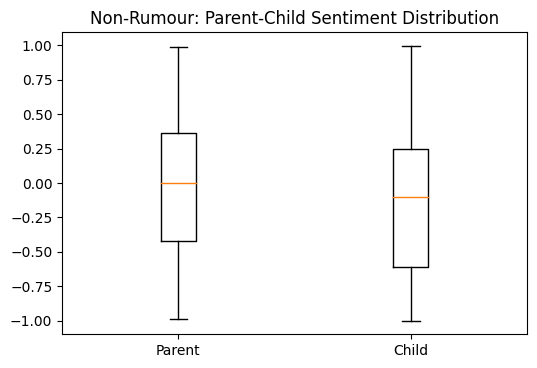

In [44]:
non_rumour_sent_data = parent_non_rumour_sentiment, child_non_rumour_sentiment
non_rumour_sent_headers = ['Parent', 'Child']
non_rumour_sent_title = 'Non-Rumour: Parent-Child Sentiment Distribution'

box_plot(non_rumour_sent_data, non_rumour_sent_headers, non_rumour_sent_title)

##### Analysis

In both rumour and non rumour tweets, parent tweets have less negative sentiment than child tweets

In [ ]:
## Get max sent impact example?

C:\Users\benja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Sentiment over time?

In [45]:
rumour_covid['time'][3]

'Sat May 30 02:22:04 +0000 2020'

In [46]:
import time
from time import strptime
from datetime import datetime
from time import mktime

a = strptime('Sun Jun 14 20:20:28 +0000 2020', '%a %b %d %H:%M:%S %z %Y')
b = strptime('Sat May 30 02:22:04 +0000 2020', '%a %b %d %H:%M:%S %z %Y')

a > b

dt = datetime.fromtimestamp(mktime(a))
dt

datetime.datetime(2020, 6, 14, 20, 20, 28)

In [47]:
rumour_time_df = rumour_covid.copy()
non_rumour_time_df = non_rumour_covid.copy()

In [ ]:
# time_df

C:\Users\benja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
def time_process(time_df):
    
    time_df['struct_time'] = time_df['time'].apply(lambda x: strptime(x, '%a %b %d %H:%M:%S %z %Y'))
    time_df['datetime'] = time_df['struct_time'].apply(lambda x: datetime.fromtimestamp(mktime(x)))

    # time_df = time_df.sort_values(by=['struct_time'])
    time_df['sentiment'] = time_df['text'].apply(lambda x: get_sentiment_score_ind(x))
    
    return time_df

In [49]:
rumour_time_df = time_process(rumour_time_df)

In [50]:
non_rumour_time_df = time_process(non_rumour_time_df)

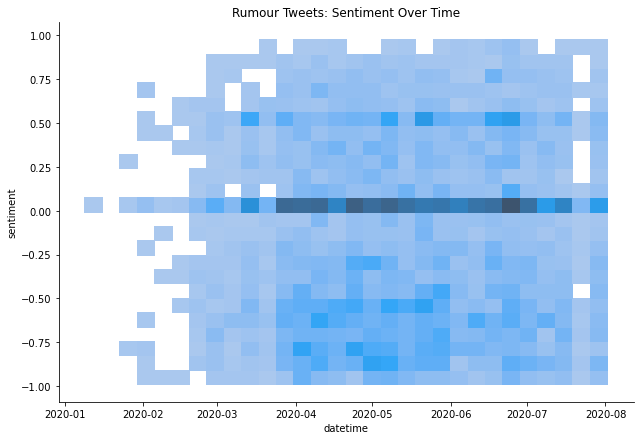

In [51]:


sns.displot(data=rumour_time_df[['datetime', 'sentiment']], x="datetime", y="sentiment", height=6, aspect=1.5).set(title='Rumour Tweets: Sentiment Over Time')

# plt.show()

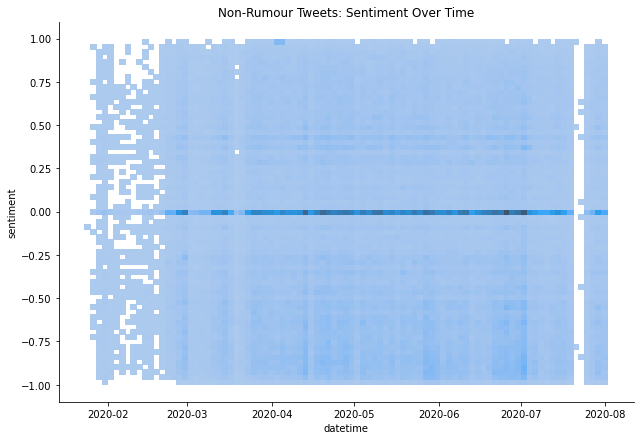

In [52]:
sns.displot(data=non_rumour_time_df[['datetime', 'sentiment']], x="datetime", y="sentiment", height=6, aspect=1.5).set(title='Non-Rumour Tweets: Sentiment Over Time')

#### Analysis

No Clear change in sentiment distribution over time for both rumour and non rumour

## Topics Over Time

#### Rumour Tweets

In [53]:
# rumour_time_df[(rumour_time_df.datetime > '08:00') & (rumour_time_df.datetime < '20:00')]
# rumour_time_df[(rumour_time_df.datetime.between_time('08:00', '12:00'))]

rumour_time_df_1 = rumour_time_df[(rumour_time_df.datetime > "2020-01") & (rumour_time_df.datetime < "2020-02")]
rumour_time_df_2 = rumour_time_df[(rumour_time_df.datetime > "2020-02") & (rumour_time_df.datetime < "2020-03")]
rumour_time_df_3 = rumour_time_df[(rumour_time_df.datetime > "2020-03") & (rumour_time_df.datetime < "2020-04")]
rumour_time_df_4 = rumour_time_df[(rumour_time_df.datetime > "2020-04") & (rumour_time_df.datetime < "2020-05")]
rumour_time_df_5 = rumour_time_df[(rumour_time_df.datetime > "2020-05") & (rumour_time_df.datetime < "2020-06")]
rumour_time_df_6 = rumour_time_df[(rumour_time_df.datetime > "2020-06") & (rumour_time_df.datetime < "2020-07")]
rumour_time_df_7 = rumour_time_df[(rumour_time_df.datetime > "2020-07") & (rumour_time_df.datetime < "2020-08")]

# df = df[(df['Date']> "2018-01-01"

In [54]:
rumour_time_df_1_topics = topics(process_tokenize(rumour_time_df_1))
rumour_time_df_2_topics = topics(process_tokenize(rumour_time_df_2))
rumour_time_df_3_topics = topics(process_tokenize(rumour_time_df_3))
rumour_time_df_4_topics = topics(process_tokenize(rumour_time_df_4))
rumour_time_df_5_topics = topics(process_tokenize(rumour_time_df_5))
rumour_time_df_6_topics = topics(process_tokenize(rumour_time_df_6))
rumour_time_df_7_topics = topics(process_tokenize(rumour_time_df_7))


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

In [55]:
print('2020-1')
pprint(rumour_time_df_1_topics)
print('2020-2')
pprint(rumour_time_df_2_topics)
print('2020-3')
pprint(rumour_time_df_3_topics)
print('2020-4')
pprint(rumour_time_df_4_topics)
print('2020-5')
pprint(rumour_time_df_5_topics)
print('2020-6')
pprint(rumour_time_df_6_topics)
print('2020-7')
pprint(rumour_time_df_7_topics)


2020-1
[(0,
  '0.028*"coronavirus" + 0.021*":" + 0.016*"go" + 0.016*"awful" + 0.015*"-" + '
  '0.014*"consumption" + 0.011*""" + 0.011*"good" + 0.010*"chinese" + '
  '0.009*"deal"'),
 (1,
  '0.026*"confirm" + 0.025*"case" + 0.023*":" + 0.018*"coronavirus" + '
  '0.017*"pneumonia" + 0.015*"#coronavirus" + 0.012*"china" + 0.012*"’" + '
  '0.012*"philippine" + 0.012*"""'),
 (2,
  '0.021*"wuhan" + 0.019*"go" + 0.016*"confirm" + 0.015*"death" + 0.015*"year" '
  '+ 0.015*"22" + 0.015*"@who" + 0.015*"bastard" + 0.015*"nobody" + '
  '0.015*"old"'),
 (3,
  '0.023*"coronavirus" + 0.018*"confirm" + 0.017*"virus" + 0.016*"chinese" + '
  '0.015*"case" + 0.014*"china" + 0.012*"immunity" + 0.011*"agent" + '
  '0.011*"smuggle" + 0.010*"biological"'),
 (4,
  '0.038*"coronavirus" + 0.027*"trump" + 0.022*"confirm" + 0.021*"case" + '
  '0.018*"say" + 0.018*":" + 0.017*"u" + 0.017*""" + 0.015*"news" + '
  '0.015*"supporter"')]
2020-2
[(0,
  '0.019*"coronavirus" + 0.011*"-" + 0.011*"case" + 0.010*"19" + 0.0

In [56]:
non_rumour_time_df_1 = non_rumour_time_df[(non_rumour_time_df.datetime > "2020-01") & (non_rumour_time_df.datetime < "2020-02")]
non_rumour_time_df_2 = non_rumour_time_df[(non_rumour_time_df.datetime > "2020-02") & (non_rumour_time_df.datetime < "2020-03")]
non_rumour_time_df_3 = non_rumour_time_df[(non_rumour_time_df.datetime > "2020-03") & (non_rumour_time_df.datetime < "2020-04")]
non_rumour_time_df_4 = non_rumour_time_df[(non_rumour_time_df.datetime > "2020-04") & (non_rumour_time_df.datetime < "2020-05")]
non_rumour_time_df_5 = non_rumour_time_df[(non_rumour_time_df.datetime > "2020-05") & (non_rumour_time_df.datetime < "2020-06")]
non_rumour_time_df_6 = non_rumour_time_df[(non_rumour_time_df.datetime > "2020-06") & (non_rumour_time_df.datetime < "2020-07")]
non_rumour_time_df_7 = non_rumour_time_df[(non_rumour_time_df.datetime > "2020-07") & (non_rumour_time_df.datetime < "2020-08")]

non_rumour_time_df_1_topics = topics(process_tokenize(non_rumour_time_df_1))
non_rumour_time_df_2_topics = topics(process_tokenize(non_rumour_time_df_2))
non_rumour_time_df_3_topics = topics(process_tokenize(non_rumour_time_df_3))
non_rumour_time_df_4_topics = topics(process_tokenize(non_rumour_time_df_4))
non_rumour_time_df_5_topics = topics(process_tokenize(non_rumour_time_df_5))
non_rumour_time_df_6_topics = topics(process_tokenize(non_rumour_time_df_6))
non_rumour_time_df_7_topics = topics(process_tokenize(non_rumour_time_df_7))

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

In [57]:
print('2020-1')
pprint(non_rumour_time_df_1_topics)
print('2020-2')
pprint(non_rumour_time_df_2_topics)
print('2020-3')
pprint(non_rumour_time_df_3_topics)
print('2020-4')
pprint(non_rumour_time_df_4_topics)
print('2020-5')
pprint(non_rumour_time_df_5_topics)
print('2020-6')
pprint(non_rumour_time_df_6_topics)
print('2020-7')
pprint(non_rumour_time_df_7_topics)

2020-1
[(0,
  '0.034*"coronavirus" + 0.016*"’" + 0.012*"flu" + 0.010*"%" + '
  '0.009*"@buzzfeednews" + 0.009*"@asapscience" + 0.008*"worry" + '
  '0.008*"wuhan" + 0.008*"rate" + 0.008*"china"'),
 (1,
  '0.022*"coronavirus" + 0.016*"#coronavirus" + 0.014*"wuhan" + 0.009*"’" + '
  '0.009*"china" + 0.009*""" + 0.008*"@who" + 0.008*"say" + '
  '0.007*"@asapscience" + 0.007*"@politico"'),
 (2,
  '0.028*"coronavirus" + 0.025*"wuhan" + 0.021*"@realdonaldtrump" + '
  '0.015*"people" + 0.014*"#coronavirus" + 0.012*"go" + 0.011*"china" + '
  '0.011*"’" + 0.008*""" + 0.007*"would"'),
 (3,
  '0.027*"coronavirus" + 0.018*"wuhan" + 0.018*"’" + 0.016*"@realdonaldtrump" '
  '+ 0.011*"china" + 0.009*"#coronavirus" + 0.009*":" + 0.009*"go" + '
  '0.007*"get" + 0.007*"@asapscience"'),
 (4,
  '0.046*"coronavirus" + 0.019*"@realdonaldtrump" + 0.017*"wuhan" + '
  '0.011*"china" + 0.010*"’" + 0.008*"trump" + 0.008*"@who" + 0.008*"virus" + '
  '0.007*"@politico" + 0.006*"chinese"')]
2020-2
[(0,
  '0.048*"cor

#### Analysis:

Rumour Tweets: 2020-01 and 2020-02 few references to death. 2020-03 onwards, alot of topics with death

Non-rumour tweets: Similar, but less topics referring to death 

## Exploring Users who post the most tweets

In [58]:
rumour_covid["user_id"].value_counts()

1095663272089608192    77
1228754267835707399    56
759251                 34
1626294277             24
292558545              24
                       ..
826442208962367488      1
1250135704069443584     1
954584072852041728      1
1277782106559709184     1
43077437                1
Name: user_id, Length: 5116, dtype: int64

In [59]:
asbtext = rumour_covid[(rumour_covid['user_id'] == 1095663272089608192) & (rumour_covid['tweet_id'] == 1272022343213125632)]['text']

In [60]:
rumour_covid['text']

0         According to the New York Times, Warner Bros. ...
3         Monkeys on the loose in India with stolen coro...
33        @HeidiNBC hong kong has had under 10 deaths ev...
45        Major League Soccer COVID-19 Testing Update - ...
80        @MattHancock 'High hopes' drug Remdesivir for ...
                                ...                        
254509    @thehill Tell every contact tracer that you go...
254527    ⚠️Crazy: Houston hospital ICU data now deleted...
254601    @NadineDorries @thetimes For goodness' sake, y...
254605    @NadineDorries June 2nd, Matt Hancock told Par...
254680    @seanhannity Breaking News: What Fox News won'...
Name: text, Length: 6414, dtype: object

In [61]:
with pd.option_context('display.max_colwidth', None):
  display(asbtext)

25496    Covid-19 (Novel Corona Virus) Updates for 14 June 2020: \n\nAll updates of the day will be listed below👇. \n\nFollow @TimesDemocracy for the fastest Corona virus updates. \n\n#Covid_19india #Covid_19 #CoronaUpdate #COVID19India
Name: text, dtype: object

In [62]:
non_rumour_covid["user_id"].value_counts()

1084980649520496642    433
3069279631             376
25073877               309
759251                 287
1228754267835707399    211
                      ... 
2400805022               1
247025119                1
3837814769               1
27651304                 1
2980636702               1
Name: user_id, Length: 154015, dtype: int64

In [63]:
non_rumour_covid[(non_rumour_covid['user_id'] == 1084980649520496642)]


,tweet_id,text,time,parent,follower_count,user_id,label,text_processed
1430,1256065687623217156,@WhiteHouse @realDonaldTrump @GovMurphy No dou...,Fri May 01 03:39:31 +0000 2020,1.255894e+18,1323,1084980649520496642,non-rumour,@whitehouse @realdonaldtrump @govmurphy no dou...
1457,1256050513919070208,@WhiteHouse @realDonaldTrump @GovMurphy Pathol...,Fri May 01 02:39:13 +0000 2020,1.255894e+18,1323,1084980649520496642,non-rumour,@whitehouse @realdonaldtrump @govmurphy pathol...
2732,1268580654926749696,"@realDonaldTrump Pathological liar, corrupt cr...",Thu Jun 04 16:29:31 +0000 2020,1.268498e+18,1328,1084980649520496642,non-rumour,@realdonaldtrump pathological liar corrupt cri...
2840,1268569932448628736,"@realDonaldTrump Corruption, mass death, &amp;...",Thu Jun 04 15:46:55 +0000 2020,1.268498e+18,1328,1084980649520496642,non-rumour,@realdonaldtrump corruption mass death &amp; e...
3792,1277830438065713152,"@GOPChairwoman @realDonaldTrump Corruption, ra...",Tue Jun 30 05:04:52 +0000 2020,1.277760e+18,1334,1084980649520496642,non-rumour,@gopchairwoman @realdonaldtrump corruption rac...
...,...,...,...,...,...,...,...,...
250145,1280336559426940929,@realDonaldTrump @seanhannity @FoxNews Corrupt...,Tue Jul 07 03:03:17 +0000 2020,1.280332e+18,1335,1084980649520496642,non-rumour,@realdonaldtrump @seanhannity @foxnews corrupt...
250152,1280391676410957826,@realDonaldTrump @seanhannity @FoxNews No surp...,Tue Jul 07 06:42:18 +0000 2020,1.280332e+18,1335,1084980649520496642,non-rumour,@realdonaldtrump @seanhannity @foxnews no surp...
252695,1249569688100765696,@realDonaldTrump Thank you. #DrFauci ... \nPos...,Mon Apr 13 05:26:44 +0000 2020,1.249373e+18,1317,1084980649520496642,non-rumour,@realdonaldtrump thank you #drfauci \npos pat...
253575,1239176615717986305,@realDonaldTrump Lmao...this must be a joke or...,Sun Mar 15 13:08:22 +0000 2020,1.239006e+18,1312,1084980649520496642,non-rumour,@realdonaldtrump lmaothis must be a joke or so...


In [64]:
with pd.option_context('display.max_colwidth', None):
  display(non_rumour_covid[(non_rumour_covid['user_id'] == 1084980649520496642)& (non_rumour_covid['tweet_id'] == 1256065687623217156)]['text'])


1430    @WhiteHouse @realDonaldTrump @GovMurphy No doubt...\n#TrumpIsANationalDisgrace \n#TrumpIsSatan\n#TrumpIsAPos\n#TrumpIsA_DANGER_ToAmerica \n#COVID19\n#CoronavirusPandemic \nhttps://t.co/PbVJicxDFk
Name: text, dtype: object